In [235]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [236]:
df = pd.read_csv("time_series_covid19_confirmed_US.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
pd.set_option('display.max_columns', None)
# Drop the null rows
df = df.dropna()
df.head(100)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
5,84001001.0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45
6,84001003.0,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181
7,84001005.0,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43
8,84001007.0,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33,34,34,38,42,42,42,42,42,42
9,84001009.0,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20,21,22,26,29,31,31,31,34,34,34,36,37,39,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,84002290.0,US,USA,840,2290.0,Yukon-Koyukuk,Alaska,US,65.508155,-151.390739,"Yukon-Koyukuk, Alaska, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
101,84004001.0,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,"Apache, Arizona, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,4,7,9,11,13,13,17,16,17,17,17,20,23,25,28,34,52,55,66,72,89,97,110,118,141,169,178,202,226,235,268,296,314,336,362,380,392,449,478,507
102,84004003.0,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,"Cochise, Arizona, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,3,3,4,4,4,4,5,7,8,9,9,9,11,11,13,15,16,15,15,18,20,22,24,28,29,31,31,34,36,36,36,37,38,39,39,39
103,84004005.0,US,USA,840,4005.0,Coconino,

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3244 entries, 5 to 3251
Columns: 113 entries, UID to 5/2/20
dtypes: float64(4), int64(103), object(6)
memory usage: 2.8+ MB


In [238]:
selected_features = df[['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_',
                        'Combined_Key','1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20',
                        '1/29/20','1/30/20','1/31/20','2/1/20','2/2/20','2/3/20','2/4/20','2/5/20','2/6/20','2/7/20','2/8/20','2/9/20','2/10/20','2/11/20','2/12/20','2/13/20','2/14/20',
                        '2/15/20','2/16/20','2/17/20','2/18/20','2/19/20','2/20/20','2/21/20','2/22/20','2/23/20',
                        '2/24/20','2/25/20','2/26/20','2/27/20','2/28/20','2/29/20','3/1/20','3/2/20','3/3/20','3/4/20',
                        '3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20',
                        '3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20',
                        '3/25/20','3/26/20','3/27/20','3/28/20','3/29/20','3/30/20','3/31/20','4/1/20','4/2/20','4/3/20',
                        '4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20',
                        '4/14/20','4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20',
                        '4/24/20','4/25/20','4/26/20','4/27/20','4/28/20','4/29/20','4/30/20','5/1/20','5/2/20']]
selected_features.head(20)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
5,84001001.0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45
6,84001003.0,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181
7,84001005.0,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43
8,84001007.0,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33,34,34,38,42,42,42,42,42,42
9,84001009.0,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20,21,22,26,29,31,31,31,34,34,34,36,37,39,40
10,84001011.0,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,"Bullock, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,3,3,3,2,2,2,2,2,2,3,3,4,4,4,5,8,8,8,8,9,9,11,11,11,12,12,12,12,12,12,12,13,14,14
11,84001013.0,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,"Butler, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,6,7,8,8,9,11,16,13,14,14,15,17,19,21,21,32,34,45,50,53,65,92
12,84001015.0,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,"Calhoun, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,3,3,3,8,9,11,12,18,21,23,34,41,49,53,54,57,59,61,62,62,62,63,66,71,80,83,85,88,89,89,91,90,92,93,94,93,98
13,84001017.0,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,"Chambers, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,5,10,13,13,17,27,33,36,42,67,80,87,89,94,101,109,151,168,181,198,212,216,221,231,236,240,245,257,259,270,275,282,282,285,289,291,293,295,290,294
14,84001019.0,US,USA,840,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,"Cherokee, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [239]:
data = X.copy()

data_binary_encoded = pd.get_dummies(selected_features)
data_binary_encoded.head()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,iso2_US,iso3_USA,Admin2_Abbeville,Admin2_Acadia,Admin2_Accomack,Admin2_Ada,Admin2_Adair,Admin2_Adams,Admin2_Addison,Admin2_Aiken,Admin2_Aitkin,Admin2_Alachua,Admin2_Alamance,Admin2_Alameda,Admin2_Alamosa,Admin2_Albany,Admin2_Albemarle,Admin2_Alcona,Admin2_Alcorn,Admin2_Aleutians East,Admin2_Aleutians West,Admin2_Alexander,Admin2_Alexandria,Admin2_Alfalfa,Admin2_Alger,Admin2_Allamakee,Admin2_Allegan,Admin2_Allegany,Admin2_Alleghany,Admin2_Allegheny,Admin2_Allen,Admin2_Allendale,Admin2_Alpena,Admin2_Alpine,Admin2_Amador,Admin2_Amelia,Admin2_Amherst,Admin2_Amite,Admin2_Anchorage,Admin2_Anderson,Admin2_Andrew,Admin2_Andrews,Admin2_Androscoggin,Admin2_Angelina,Admin2_Anne Arundel,Admin2_Anoka,Admin2_Anson,Admin2_Antelope,Admin2_Antrim,Admin2_Apache,Admin2_Appanoose,Admin2_Appling,Admin2_Appomattox,Admin2_Aransas,Admin2_Arapahoe,Admin2_Archer,Admin2_Archuleta,Admin2_Arenac,Admin2_Arkansas,Admin2_Arlington,Admin2_Armstrong,Admin2_Aroostook,Admin2_Arthur,Admin2_Ascension,Admin2_Ashe,Admin2_Ashland,Admin2_Ashley,Admin2_Ashtabula,Admin2_Asotin,Admin2_Assumption,Admin2_Atascosa,Admin2_Atchison,Admin2_Athens,Admin2_Atkinson,Admin2_Atlantic,Admin2_Atoka,Admin2_Attala,Admin2_Audrain,Admin2_Audubon,Admin2_Auglaize,Admin2_Augusta,Admin2_Aurora,Admin2_Austin,Admin2_Autauga,Admin2_Avery,Admin2_Avoyelles,Admin2_Baca,Admin2_Bacon,Admin2_Bailey,Admin2_Baker,Admin2_Baldwin,Admin2_Ballard,Admin2_Baltimore,Admin2_Baltimore City,Admin2_Bamberg,Admin2_Bandera,Admin2_Banks,Admin2_Banner,Admin2_Bannock,Admin2_Baraga,Admin2_Barber,Admin2_Barbour,Admin2_Barnes,Admin2_Barnstable,Admin2_Barnwell,Admin2_Barren,Admin2_Barron,Admin2_Barrow,Admin2_Barry,Admin2_Bartholomew,Admin2_Barton,Admin2_Bartow,Admin2_Bastrop,Admin2_Bates,Admin2_Bath,Admin2_Baxter,Admin2_Bay,Admin2_Bayfield,Admin2_Baylor,Admin2_Beadle,Admin2_Bear Lake,Admin2_Beaufort,Admin2_Beauregard,Admin2_Beaver,Admin2_Beaverhead,Admin2_Becker,Admin2_Beckham,Admin2_Bedford,Admin2_Bee,Admin2_Belknap,Admin2_Bell,Admin2_Belmont,Admin2_Beltrami,Admin2_Ben Hill,Admin2_Benewah,Admin2_Bennett,Admin2_Bennington,Admin2_Benson,Admin2_Bent,Admin2_Benton,Admin2_Benzie,Admin2_Bergen,Admin2_Berkeley,Admin2_Berks,Admin2_Berkshire,Admin2_Bernalillo,Admin2_Berrien,Admin2_Bertie,Admin2_Bethel,Admin2_Bexar,Admin2_Bibb,Admin2_Bienville,Admin2_Big Horn,Admin2_Big Stone,Admin2_Billings,Admin2_Bingham,Admin2_Black Hawk,Admin2_Blackford,Admin2_Bladen,Admin2_Blaine,Admin2_Blair,Admin2_Blanco,Admin2_Bland,Admin2_Bleckley,Admin2_Bledsoe,Admin2_Blount,Admin2_Blue Earth,Admin2_Boise,Admin2_Bolivar,Admin2_Bollinger,Admin2_Bon Homme,Admin2_Bond,Admin2_Bonner,Admin2_Bonneville,Admin2_Boone,Admin2_Borden,Admin2_Bosque,Admin2_Bossier,Admin2_Botetourt,Admin2_Bottineau,Admin2_Boulder,Admin2_Boundary,Admin2_Bourbon,Admin2_Bowie,Admin2_Bowman,Admin2_Box Butte,Admin2_Box Elder,Admin2_Boyd,Admin2_Boyle,Admin2_Bracken,Admin2_Bradford,Admin2_Bradley,Admin2_Branch,Admin2_Brantley,Admin2_Braxton,Admin2_Brazoria,Admin2_Brazos,Admin2_Breathitt,Admin2_Breckinridge,Admin2_Bremer,Admin2_Brevard,Admin2_Brewster,Admin2_Briscoe,Admin2_Bristol,Admin2_Bristol Bay,Admin2_Broadwater,Admin2_Bronx,Admin2_Brooke,Admin2_Brookings,Admin2_Brooks,Admin2_Broome,Admin2_B

In [240]:
dummies_features = data_binary_encoded[['UID','code3','FIPS','Lat','Long_',
                        '1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20',
                        '1/29/20','1/30/20','1/31/20','2/1/20','2/2/20','2/3/20','2/4/20','2/5/20','2/6/20','2/7/20','2/8/20','2/9/20','2/10/20','2/11/20','2/12/20','2/13/20','2/14/20',
                        '2/15/20','2/16/20','2/17/20','2/18/20','2/19/20','2/20/20','2/21/20','2/22/20','2/23/20',
                        '2/24/20','2/25/20','2/26/20','2/27/20','2/28/20','2/29/20','3/1/20','3/2/20','3/3/20','3/4/20',
                        '3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20',
                        '3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20',
                        '3/25/20','3/26/20','3/27/20','3/28/20','3/29/20','3/30/20','3/31/20','4/1/20','4/2/20','4/3/20',
                        '4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20',
                        '4/14/20','4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20',
                        '4/24/20','4/25/20','4/26/20','4/27/20','4/28/20','4/29/20','4/30/20','5/1/20','5/2/20']]
dummies_features.head(20)

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
5,84001001.0,840,1001.0,32.539527,-86.644082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45
6,84001003.0,840,1003.0,30.727750,-87.722071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181
7,84001005.0,840,1005.0,31.868263,-85.387129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43
8,84001007.0,840,1007.0,32.996421,-87.125115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33,34,34,38,42,42,42,42,42,42
9,84001009.0,840,1009.0,33.982109,-86.567906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20,21,22,26,29,31,31,31,34,34,34,36,37,39,40
10,84001011.0,840,1011.0,32.100305,-85.712655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,3,3,3,2,2,2,2,2,2,3,3,4,4,4,5,8,8,8,8,9,9,11,11,11,12,12,12,12,12,12,12,13,14,14
11,84001013.0,840,1013.0,31.753001,-86.680575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,3,3,6,7,8,8,9,11,16,13,14,14,15,17,19,21,21,32,34,45,50,53,65,92
12,84001015.0,840,1015.0,33.774837,-85.826304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,3,3,3,8,9,11,12,18,21,23,34,41,49,53,54,57,59,61,62,62,62,63,66,71,80,83,85,88,89,89,91,90,92,93,94,93,98
13,84001017.0,840,1017.0,32.913601,-85.390727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,5,10,13,13,17,27,33,36,42,67,80,87,89,94,101,109,151,168,181,198,212,216,221,231,236,240,245,257,259,270,275,282,282,285,289,291,293,295,290,294
14,84001019.0,840,1019.0,34.178060,-85.606390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,4,5,6,6,6,6,7,7,7,7,8,9,9,9,11,12,12,12,12,13,13,12,12,12,14,14,15,15,15,15,15


In [241]:
# get X and y variables
y = df["Province_State"]
X = dummies_features

In [242]:
# split the data to train and test values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [243]:
X_train.head()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
101,84004001.0,840,4001.0,35.394650,-109.489238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,4,7,9,11,13,13,17,16,17,17,17,20,23,25,28,34,52,55,66,72,89,97,110,118,141,169,178,202,226,235,268,296,314,336,362,380,392,449,478,507
2436,84047007.0,840,47007.0,35.599430,-85.206120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,8,8,8,7,7,8,9,10,11,11,351,585,586,588,588,589,592,594,595,596
3018,84054043.0,840,54043.0,38.172154,-82.070180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2
1655,84030105.0,840,30105.0,48.364351,-106.666963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1830,84035057.0,840,35057.0,34.640484,-105.850895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,6,6,7,7,7,8,9,10,10,10,12,12,12,12,12,13,13,13,13,13,13,14,14,15,15,15,15,16


In [244]:
# Import dependencies
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from tensorflow.keras.utils import to_categorical

# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[43 50 18  9 46 17 42 20 38 17  4 47 23 27  6 37 42 43 10 33 27 29 14  9
 48 10 17 46 10 17 24 43 49  0  3  3  1 17  3 24 49  5 13  5 16  9 26 46
 35 22 43 43  3 30  5  3 10 43  4 46 15 49 48  5 13 15 38 46 48 46 43 32
 14 49 17 14 26 37  0 23 43  3 17 25 22 15 15 18  0 15 25 25  1 23 43  2
 25 16 10 27  1 43 10  4 25 41 14 10 35 20 32 28  3 25 40 13 40 26 13 24
 43 30 16 10 32 17 35  9 10 10 34 10 28 10  4 35 25 24 18 43 37 15  5 41
 43 46  0 16  5 10  3 40 22 27 34 49 25 17  5 49 23 34 25 36 43 38 46 15
  6 22 33 13 25 24 27 14 23  0  5  3 23 18 22  4 42 10  0 43 13 26 50 23
 24 24 42  4 16 17 41 15 26 12 17 25 43 49 47 18 24 30 16 32  1 23 24 35
 15 15 35 22 10 18 10 43 25 35 48 43 47  0 15 21 40  0 12 22  0 24 40 43
 18 16 48 46 33 43 36 27  3 12  3 46 14 10 22 43 44 15  5 16 33 42  4 46
 33 25 13 35 34 25 23 26 35  0 43  4 43 44 41 27 22 45  5 15 13 15 43  9
 35 25 40 25 27 43  9  0 13 42 34 10 19  9 46 35  4 10  5 45 49 13  3 10
 38 25 23 46 35  0  3 43 43 10 10 25 42 50 35 49 14

In [245]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [246]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.938347718865598
Testing Data Score: 0.9124537607891492


In [247]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.67      1.00      0.80         2
           3       1.00      0.96      0.98        24
           4       1.00      0.90      0.95        20
           5       0.95      1.00      0.98        20
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         1
           9       0.94      0.94      0.94        18
          10       0.98      0.98      0.98        49
          11       1.00      1.00      1.00         2
          12       1.00      0.93      0.96        14
          13       0.74      0.61      0.67        28
          14       0.44      0.67      0.53        18
          15       1.00      0.97      0.98        29
          16       0.95      0.91      0.93        23
          17       1.00      0.97      0.99        38
          18       1.00    

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [249]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.922, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.914, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.926, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.914, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.905, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.922, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.914, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.926, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.914, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.922, total=   0.2s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.912, total=   0.2s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.940, total=   0.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.930, total=   0.2s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.916, total=   0.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.922, total=   0.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.912, total=   0.2s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   21.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [250]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.9284829433585993


In [251]:
import joblib
filename = 'FinalProject1_ConfirmedCases_US_model.sav'
joblib.dump(model, filename)

['FinalProject1_ConfirmedCases_US_model.sav']

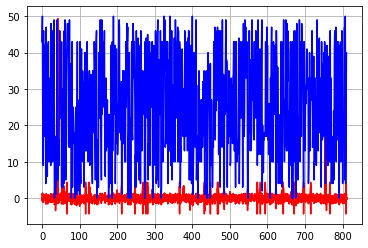

In [259]:
plt.grid(True)
plt.plot(X_test_scaled, color = "red")
plt.plot(encoded_y_test, color = "blue")
plt.show()

No handles with labels found to put in legend.


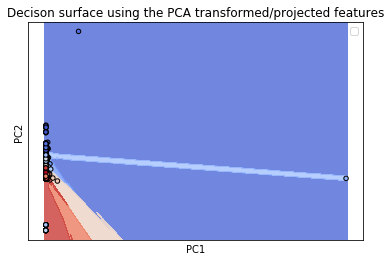

In [260]:
from sklearn.svm import SVC
import numpy as np

from sklearn import svm
from sklearn.decomposition import PCA

X = (X_test_scaled)
y = (encoded_y_test)

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()


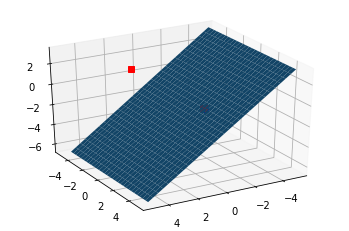

In [262]:
from mpl_toolkits.mplot3d import Axes3D

X = (X_test_scaled[:, :3])
Y = (encoded_y_test)
#X = iris.data[:, :3]  # we only take the first three features.
#Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [252]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
# fit the data and make predictions
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
predictions

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([43, 50, 18, 10, 46, 17, 42, 14, 38, 17,  4, 47, 23, 27, 14, 37, 42,
       43, 10, 33, 27, 32, 17, 10, 46, 10, 17, 35, 10, 17, 24, 43, 49,  0,
        3,  3,  1, 17,  3, 24, 49,  5, 21,  5, 16,  9, 26, 46, 35, 22, 43,
       43,  3, 32,  5,  3, 10, 43,  4, 46, 15, 49, 46,  5, 13, 15, 46, 46,
       46, 46, 43, 32, 17, 49, 17, 13, 26, 37,  0, 23, 43,  3, 17, 25, 23,
       15, 15, 18,  0, 15, 30, 25,  1, 23, 43,  4, 25, 16, 10, 27,  1, 43,
       10,  4, 25, 41, 14, 10, 35, 14, 32, 37, 10, 25, 42, 17, 46, 26, 13,
       24, 43, 32, 16, 10, 32, 43, 35,  9, 10, 10, 34, 10, 43, 10,  4, 35,
       25, 24, 18, 43, 37, 15,  5, 41, 43, 46,  0, 16,  5, 10,  3, 42, 22,
       27, 34, 49, 25, 17,  5, 49, 23, 34, 25, 36, 43, 35, 46, 15, 20, 22,
       33, 17, 25, 24, 27, 14, 23,  0,  5,  3, 23, 18, 22,  4, 42, 10,  0,
       43, 17, 26, 50, 23, 24, 24, 42,  4, 16, 17, 41, 23, 26, 16, 17, 25,
       43, 49, 47, 18, 24, 22, 16, 32, 46, 23, 24, 35, 15, 15, 35, 22, 10,
       24,  9, 43, 25, 35

In [254]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.8060008220304151
Testing Data Score: 0.7953144266337855


In [255]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.80      0.89        10
           2       0.00      0.00      0.00         2
           3       1.00      0.92      0.96        24
           4       0.89      0.85      0.87        20
           5       1.00      1.00      1.00        20
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       0.80      0.67      0.73        18
          10       0.87      0.98      0.92        49
          11       0.00      0.00      0.00         2
          12       0.92      0.79      0.85        14
          13       0.57      0.14      0.23        28
          14       0.50      0.61      0.55        18
          15       0.78      0.97      0.86        29
          16       0.88      0.91      0.89        23
          17       0.67      0.92      0.78        38
          18       0.88    

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50, 100],
             'max_iter':[200, 500, 1000]}
grid = GridSearchCV(model,param_grid, verbose=3)

In [257]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=10, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................. C=10, max_iter=200, score=0.842, total=   1.0s
[CV] C=10, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .................. C=10, max_iter=200, score=0.860, total=   1.1s
[CV] C=10, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=10, max_iter=200, score=0.848, total=   0.9s
[CV] C=10, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=10, max_iter=200, score=0.883, total=   1.0s
[CV] C=10, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=10, max_iter=200, score=0.848, total=   1.0s
[CV] C=10, max_iter=500 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=10, max_iter=500, score=0.844, total=   2.4s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.862, total=   1.4s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.848, total=   1.4s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.883, total=   1.7s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.850, total=   2.0s
[CV] C=10, max_iter=1000 .............................................
[CV] ................. C=10, max_iter=1000, score=0.842, total=   2.3s
[CV] C=10, max_iter=1000 .............................................
[CV] ................. C=10, max_iter=1000, score=0.862, total=   1.4s
[CV] C=10, max_iter=1000 .............................................
[CV] .

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=200, score=0.883, total=   1.0s
[CV] C=50, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=200, score=0.867, total=   1.0s
[CV] C=50, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=200, score=0.871, total=   0.9s
[CV] C=50, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=200, score=0.885, total=   1.2s
[CV] C=50, max_iter=200 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=200, score=0.870, total=   1.0s
[CV] C=50, max_iter=500 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=500, score=0.877, total=   2.6s
[CV] C=50, max_iter=500 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=500, score=0.877, total=   2.7s
[CV] C=50, max_iter=500 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=500, score=0.875, total=   2.2s
[CV] C=50, max_iter=500 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=500, score=0.893, total=   2.5s
[CV] C=50, max_iter=500 ..............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=500, score=0.874, total=   2.3s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=0.877, total=   4.2s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=0.877, total=   2.5s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=0.875, total=   2.7s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=0.893, total=   3.3s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=0.874, total=   4.2s
[CV] C=100, max_iter=200 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.885, total=   1.1s
[CV] C=100, max_iter=200 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.862, total=   1.0s
[CV] C=100, max_iter=200 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.877, total=   1.0s
[CV] C=100, max_iter=200 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.881, total=   1.2s
[CV] C=100, max_iter=200 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.874, total=   1.3s
[CV] C=100, max_iter=500 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=500, score=0.879, total=   2.6s
[CV] C=100, max_iter=500 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=500, score=0.869, total=   2.4s
[CV] C=100, max_iter=500 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=500, score=0.877, total=   2.3s
[CV] C=100, max_iter=500 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=500, score=0.889, total=   2.8s
[CV] C=100, max_iter=500 .............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=500, score=0.877, total=   2.8s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=0.879, total=   4.2s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=0.871, total=   3.4s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=0.877, total=   3.1s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=0.889, total=   4.3s
[CV] C=100, max_iter=1000 ............................................


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished


[CV] ................ C=100, max_iter=1000, score=0.877, total=   5.1s


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 50, 100], 'max_iter': [200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [258]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'max_iter': 500}
0.8791652935161947
